In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
import librosa
import librosa.display
import IPython.display as ipd

In [4]:
df = pd.read_csv("D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\metadata\\UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
class_name = ["air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]

In [6]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [7]:
features = []
labels = []

def parser():
    # Function to load files and extract features
    for i in range(df.shape[0]):
        file_name = 'D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\audio\\fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        data, sr = librosa.load(file_name, res_type='kaiser_fast') 
        mels = np.mean(librosa.feature.melspectrogram(y = data, sr = sr), axis=1)        
        features.append(mels)
        labels.append(df["classID"][i])

    return features, labels

In [8]:
x, y = parser()

C:\Pythondj\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
C:\Pythondj\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Pythondj\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


In [9]:
X = np.array(x)
Y = np.array(y)

print(X.shape)
print(Y.shape)

(8732, 128)
(8732,)


In [10]:
print(X.dtype)
print(Y.dtype)

float32
int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6549, 128), (6549,), (2183, 128), (2183,))

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [17]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([2, 2, 8, ..., 2, 4, 3], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.4494


In [19]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([9, 4, 5, ..., 2, 2, 2], dtype=int64)

In [20]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.4982


In [21]:
confusion_matrix(y_test, y_pred_test)

array([[ 75,   0, 113,   3,   3,  15,   0,   0,   0,  29],
       [  6,  57,  32,   9,   5,   4,   1,   1,   2,   4],
       [  7,   0, 196,   8,   4,   7,   1,   1,   5,   4],
       [  7,   3,  92,  95,  10,   6,   1,   1,  24,   7],
       [ 17,   0,  42,  24, 121,   2,   0,  28,   2,  22],
       [ 15,   1, 106,  16,   4,  93,   0,   6,   3,  11],
       [  3,   0,  22,   6,  12,   4,  44,   6,   0,   2],
       [ 21,   0,  25,   8,  19,   4,   0, 130,   4,  55],
       [  0,   0, 106,  12,   1,   3,   0,   1,  95,   5],
       [ 32,   2,  85,  20,   4,  11,   2,  10,   3,  75]], dtype=int64)

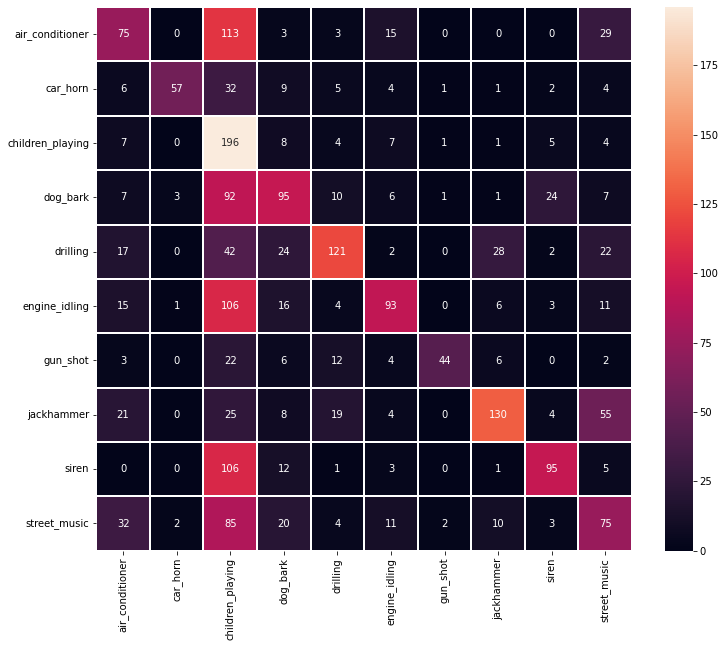

In [22]:
plt.figure(figsize = (12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_test), 
            annot = True, linewidths = 2, fmt="d", 
            xticklabels = class_name,
            yticklabels = class_name)
plt.show()